<a href="https://colab.research.google.com/github/catastropiyush/course_notes/blob/main/Assignment2_Numerical_methods_Piyush.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install smplotlib
import smplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.1/424.1 kB 20.2 MB/s eta 0:00:00


https://web.njit.edu/~shahriar/class_home/Math453/power.pdf

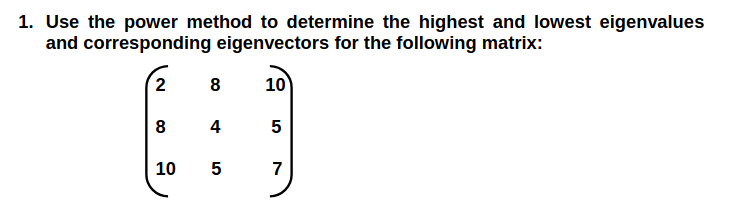

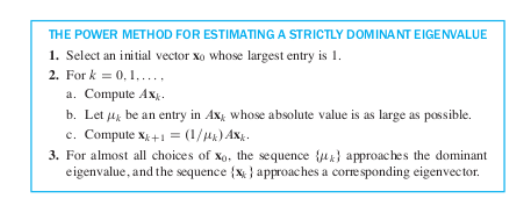

In [15]:
#Question 1
import numpy as np

def power_method(A, max_iter=100, tol=1e-10):
    n = A.shape[0]
    v = np.random.rand(n)        # Initialize random vector
    v = v / np.linalg.norm(v)

    lambda_old = 0
    for _ in range(max_iter):
        w = A @ v
        lambda_new = np.dot(w, v) / np.dot(v, v) #Rayleigh quotient
        v = w / np.linalg.norm(w) #Normalize vector

        if abs(lambda_new - lambda_old) < tol:
            return lambda_new, v
        lambda_old = lambda_new

    return lambda_new, v

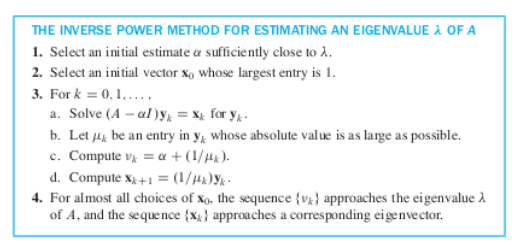

In [8]:
def inverse_power_method(A, max_iter=100, tol=1e-10):
    n = A.shape[0]
    v = np.random.rand(n)
    v = v / np.linalg.norm(v)

    lambda_old = 0
    for _ in range(max_iter):
        w = np.linalg.solve(A, v)
        lambda_new = np.dot(v, v) / np.dot(w, v)
        v = w / np.linalg.norm(w)

        if abs(lambda_new - lambda_old) < tol:
            return lambda_new, v
        lambda_old = lambda_new

    return lambda_new, v

In [17]:
A = np.array([
    [2, 8, 10],
    [8, 4, 5],
    [10, 5, 7]
])

#Power method
lambda_max, v_max = power_method(A)
print(f"Largest eigenvalue: {lambda_max:.6f}")
print(f"Corresponding eigenvector: {v_max}")

#Inverse power method
lambda_min, v_min = inverse_power_method(A)
print(f"\nSmallest eigenvalue: {lambda_min:.6f}")
print(f"Corresponding eigenvector: {v_min}")

true_eigenvals = np.linalg.eigvals(A)
print(f"\nTrue eigenvalues from numpy: {np.sort(true_eigenvals)}")

Largest eigenvalue: 19.884236
Corresponding eigenvector: [0.58212762 0.4959949  0.64429535]

Smallest eigenvalue: 0.294244
Corresponding eigenvector: [ 0.03202159  0.77779682 -0.62769955]

True eigenvalues from numpy: [-7.1784802   0.29424417 19.88423603]


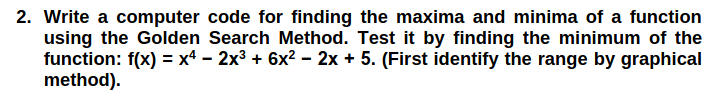

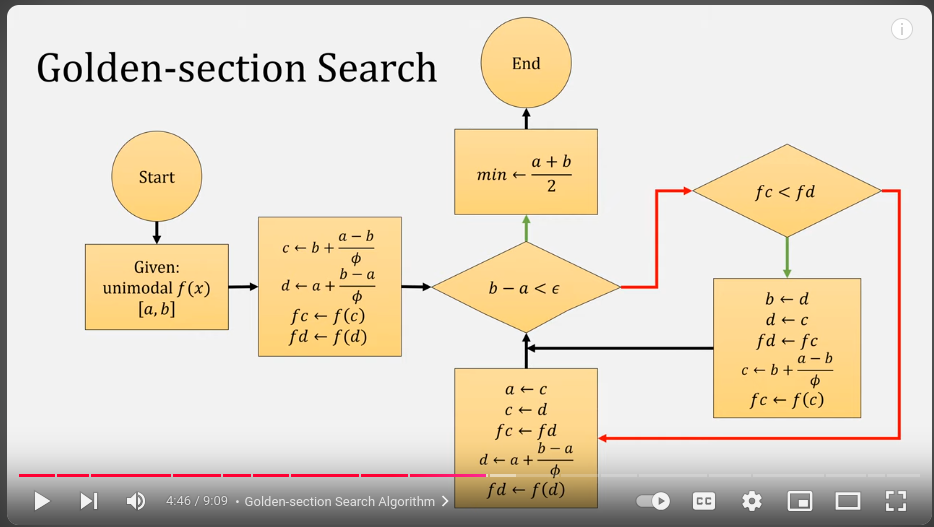

In [18]:
#Question 2 : Golden search method
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**4 - 2*x**3 + 6*x**2 - 2*x + 5

def golden_search(f, a, b, tol=1e-6):
    gr = (np.sqrt(5) - 1) / 2
    c = b - gr * (b - a)
    d = a + gr * (b - a)
    fc = f(c)
    fd = f(d)

    while abs(b - a) > tol:
        if fc < fd:  # Minimum is in left interval
            b = d
            d = c
            fd = fc
            c = b - gr * (b - a)
            fc = f(c)
        else:        # Minimum is in right interval
            a = c
            c = d
            fc = fd
            d = a + gr * (b - a)
            fd = f(d)

    # Return the midpoint of the final interval
    x_min = (a + b) / 2
    return x_min, f(x_min)

x_min, f_min = golden_search(f, -1, 2)
print(f"Minimum found at x = {x_min:.6f}")
print(f"Minimum value = {f_min:.6f}")

Minimum found at x = 0.181083
Minimum value = 4.823780


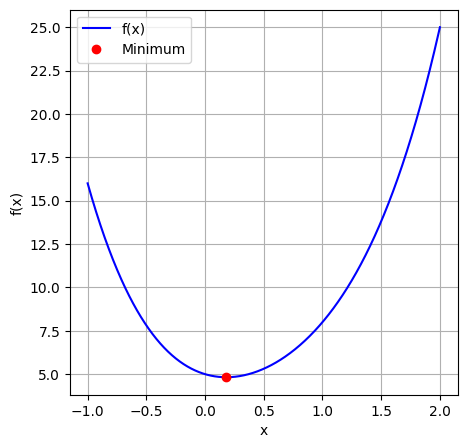

In [19]:
x = np.linspace(-1, 2, 1000)
y = f(x)
plt.figure(figsize=(5,5))
plt.plot(x, y, 'b-', label='f(x)')
plt.plot(x_min, f_min, 'ro', label='Minimum')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

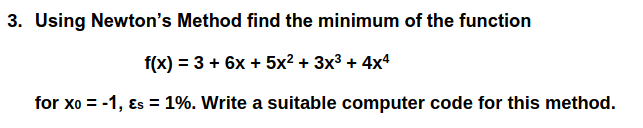

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 3 + 6*x + 5*x**2 + 3*x**3 + 4*x**4

def f_prime(x):
    return 6 + 10*x + 9*x**2 + 16*x**3

def f_double_prime(x):
    return 10 + 18*x + 48*x**2

def newton_method(x0, es=0.01, max_iter=100):
    x_history = [x0]
    f_history = [f(x0)]

    x_old = x0
    iter_count = 0
    ea = 100      # initial error estimate

    while ea > es and iter_count < max_iter:
        x_new = x_old - f_prime(x_old)/f_double_prime(x_old)

        if x_new != 0:
            ea = abs((x_new - x_old)/x_new) * 100
        x_old = x_new
        iter_count += 1
        x_history.append(x_new)
        f_history.append(f(x_new))
        print(f"Iteration {iter_count}: x = {x_new:.6f}, f(x) = {f(x_new):.6f}, Error = {ea:.6f}%")

    return x_history, f_history

# Initial parameters
x0 = -1      # Initial guess
es = 1.0     # Stopping criterion

x_history, f_history = newton_method(x0, es)
# Final results
x_min = x_history[-1]
f_min = f_history[-1]

print("\nFinal Results:")
print(f"Minimum found at x = {x_min:.6f}")
print(f"Minimum value = {f_min:.6f}")

Iteration 1: x = -0.725000, f(x) = 1.240017, Error = 37.931034%
Iteration 2: x = -0.607028, f(x) = 1.072327, Error = 19.434412%
Iteration 3: x = -0.587172, f(x) = 1.068971, Error = 3.381640%
Iteration 4: x = -0.586683, f(x) = 1.068969, Error = 0.083350%

Final Results:
Minimum found at x = -0.586683
Minimum value = 1.068969


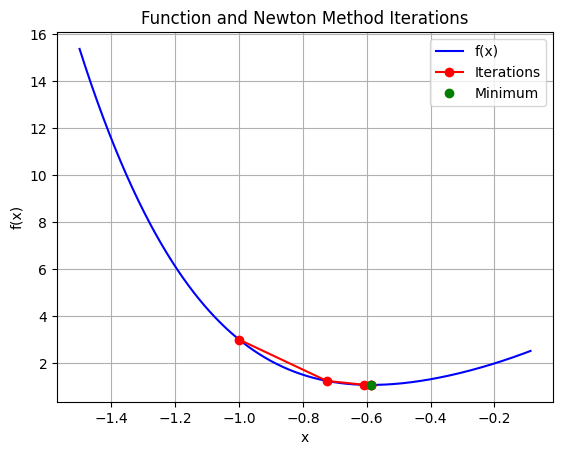

In [ ]:
def plot_results():
    x = np.linspace(min(x_history)-0.5, max(x_history)+0.5, 1000)
    y = f(x)
    plt.plot(x, y, 'b-', label='f(x)')
    plt.plot(x_history, f_history, 'ro-', label='Iterations')
    plt.plot(x_min, f_min, 'go', label='Minimum')
    plt.grid(True)
    plt.title('Function and Newton Method Iterations')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()

plot_results()

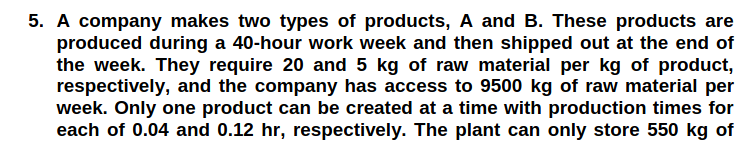

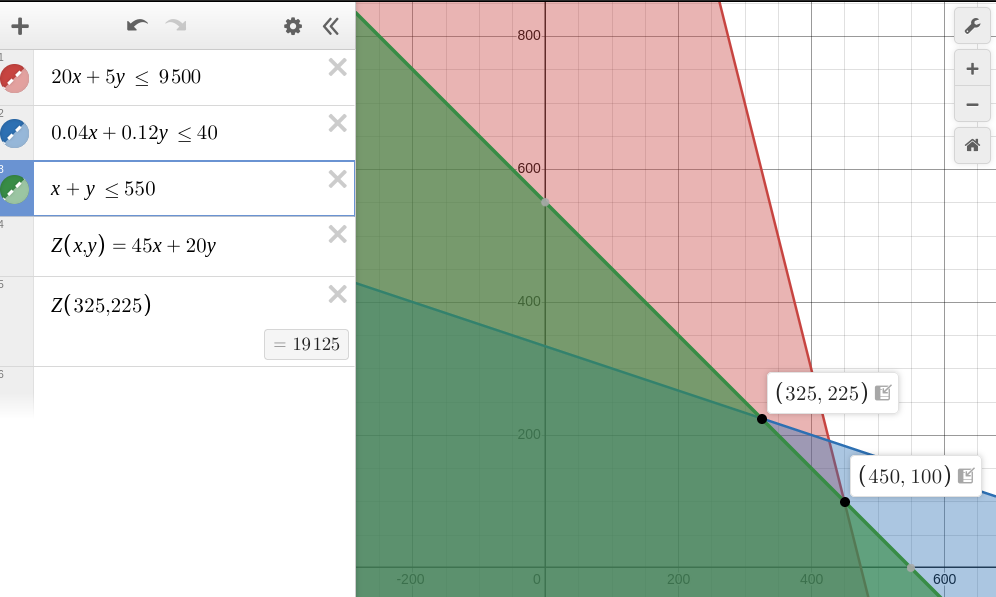

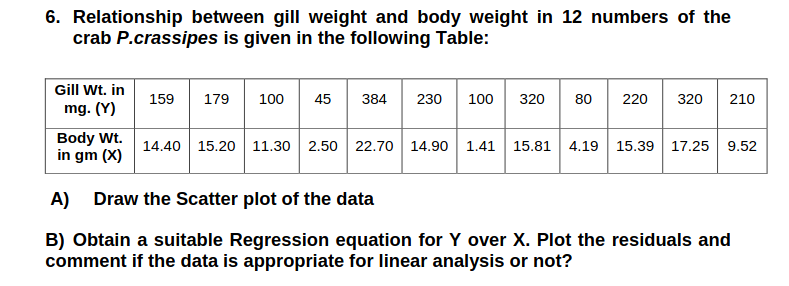

In [3]:
#question no 6: Relationship between gill weight and body weight
import numpy as np
import matplotlib.pyplot as plt

# Data
Y = np.array([159, 179, 100, 45, 384, 230, 100, 320, 80, 220, 320, 210]).reshape(-1,1)
X_raw = np.array([14.40, 15.20, 11.30, 2.50, 22.70, 14.90, 1.41, 15.81, 4.19, 15.39, 17.25, 9.52])

X = np.column_stack([np.ones_like(X_raw), X_raw])

X_transpose = np.transpose(X)                        # Xᵀ
X_transpose_X = np.dot(X_transpose, X)               # XᵀX
X_transpose_X_inv = np.linalg.inv(X_transpose_X)     # (XᵀX)⁻¹
X_transpose_Y = np.dot(X_transpose, Y)               # XᵀY
beta = np.dot(X_transpose_X_inv, X_transpose_Y)      # β = (XᵀX)⁻¹XᵀY

Y_pred = np.dot(X, beta)
residuals = Y - Y_pred

SS_tot = np.sum((Y - np.mean(Y))**2)   # Total Sum of Squares: Σ(yᵢ - ȳ)²
SS_res = np.sum(residuals**2)          # Residual Sum of Squares: Σ(yᵢ - ŷᵢ)²
R_squared = 1 - (SS_res/SS_tot)        # R² = 1 - SSres/SStot

In [5]:
print(R_squared)
#With a R^2 value of 0.74 we can say that the linear fit is okay.

0.7485463198488003


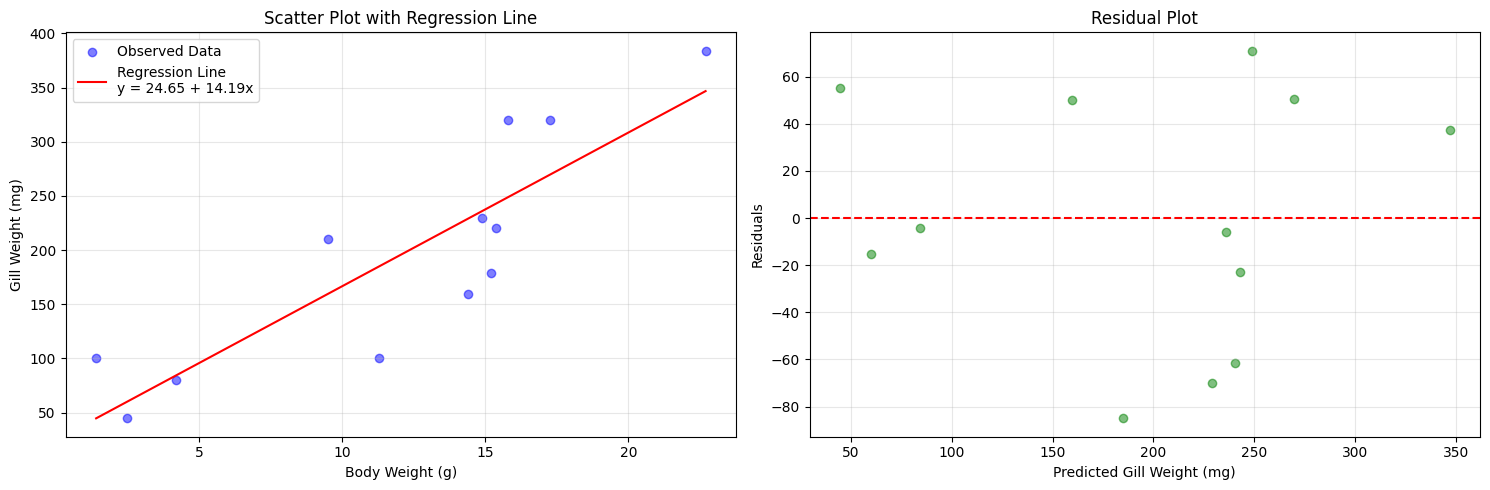

Intercept (β₀): 24.6540
Slope (β₁): 14.1879


In [22]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_raw, Y, color='blue', alpha=0.5, label='Observed Data')
X_line = np.array([min(X_raw), max(X_raw)])
Y_line = beta[0] + beta[1] * X_line
plt.plot(X_line, Y_line, color='red',
         label=f'Regression Line\ny = {beta[0][0]:.2f} + {beta[1][0]:.2f}x')
plt.xlabel('Body Weight (g)')
plt.ylabel('Gill Weight (mg)')
plt.title('Scatter Plot with Regression Line')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(Y_pred, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Gill Weight (mg)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Intercept (β₀): {beta[0][0]:.4f}")
print(f"Slope (β₁): {beta[1][0]:.4f}")

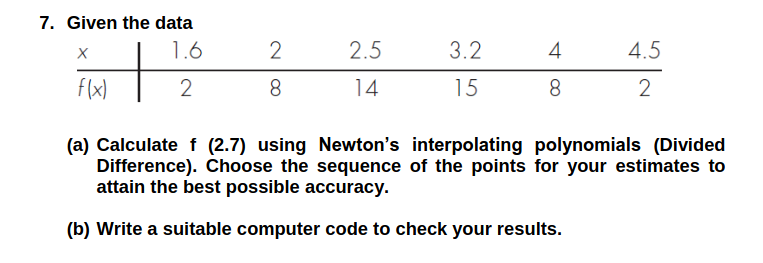

In [24]:
#Question no 7: Newton interpolating polynomial
import numpy as np

def divided_differences(x, y):
    n = len(x)
    coef = np.zeros([n, n])
    coef[:,0] = y
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] - x[i])
    return coef

def newton_interpolation(x_data, y_data, x):
    n = len(x_data)
    coef = divided_differences(x_data, y_data)

    result = coef[0][0]
    temp = 1
    for j in range(1, n):
        temp *= (x - x_data[j-1])
        result += coef[0][j] * temp
    return result


x_data = np.array([1.6, 2.0, 2.5, 3.2,4,4.5])
y_data = np.array([2,8,14,15,8,2])
x_interpolate = 2.7

newton_result = newton_interpolation(x_data, y_data, x_interpolate)

print(f"Newton's Interpolation f(2.7) = {newton_result:.4f}")

Newton's Interpolation f(2.7) = 15.2158


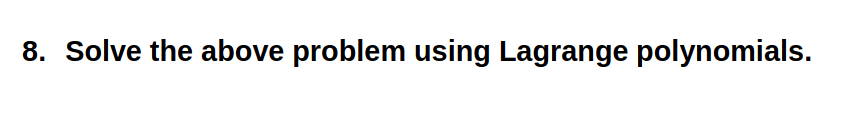

In [23]:
 # Question no 8: Solve the problems using langrange interpolation
def lagrange_interpolation(x_data, y_data, x):
    n = len(x_data)
    result = 0

    for i in range(n):
        term = y_data[i]
        for j in range(n):
            if j != i:
                term *= (x - x_data[j]) / (x_data[i] - x_data[j])
        result += term
    return result

lagrange_result = lagrange_interpolation(x_data, y_data, x_interpolate)

print(f"Lagrange's Interpolation f(2.7) = {lagrange_result:.4f}")

Lagrange's Interpolation f(2.7) = 15.2158
